# Cat or Dog - Classifier 

start with basic imports - system set up

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from zipfile import ZipFile
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop

---
## Load Pictures 

In [2]:
train_dir = "./train/"
test_dir = "./test1/"

In [3]:
train_names = os.listdir(train_dir)
categories = []
for filename in train_names:
    category = filename.split(".")[0]
    if category == "dog":
        categories.append("dog")
    else:
        categories.append("cat")
df = pd.DataFrame({
    "filename" : train_names,
    "category" : categories
})

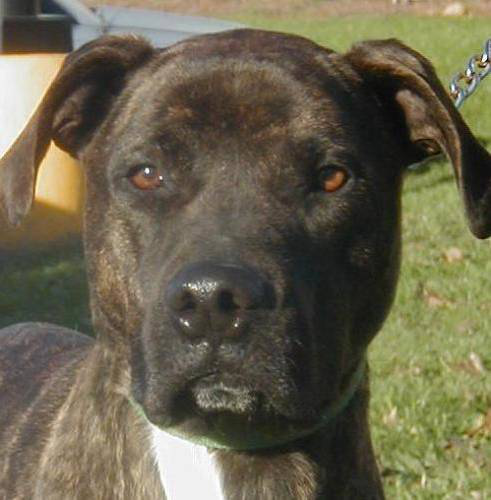

In [7]:
load_img(train_dir+random.choice(df.filename))

---
## Build Model and Train Model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [9]:
train_df, validate_df = train_test_split(df, test_size = 0.2, random_state = 42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [10]:
train_datagen = ImageDataGenerator(rotation_range=40,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./train/", 
    x_col='filename',
    y_col='category',
    target_size=(120,120),
    class_mode='binary',
    batch_size=64,
    color_mode="rgb",
    shuffle=True
)

Found 20000 validated image filenames belonging to 2 classes.


In [11]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train/", 
    x_col='filename',
    y_col='category',
    target_size=(120,120),
    class_mode='binary',
    batch_size=64,
    color_mode="rgb",
    shuffle=True
)

Found 5000 validated image filenames belonging to 2 classes.


In [12]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_df)/64,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(validate_df)/64
)

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy' ]
val_acc  = history.history['val_accuracy' ]
loss     = history.history['loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [20]:
model.save('scond_try_model.h5')

---
## Load and use Model 

In [2]:
from keras.models import load_model 
model = load_model('scond_try_model.h5')
from keras.preprocessing import image

def classify(img_name):
    img = image.load_img(img_name ,False,target_size=(120,120))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    x = model.predict(img)[0][0]
    x = int(x*100)
    
    if x < 50:
        return ('CAT - ' + str(100-x) + '% cat; ' + str(x) + '% dog')
    if x > 50:
        return ('DOG - ' + str(100-x) + '% cat; ' + str(x) + '% dog')   

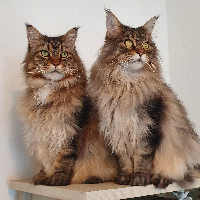

'CAT - 100% cat; 0% dog'

In [3]:
display(image.load_img('my_cats/slides.jpg',False,target_size=(200,200)), classify('my_cats/slides.jpg'))

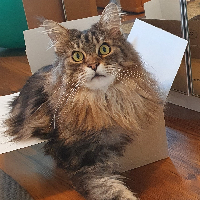

'CAT - 54% cat; 46% dog'

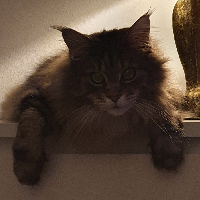

'CAT - 100% cat; 0% dog'

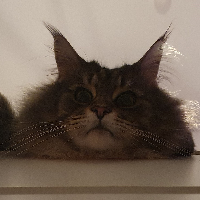

'CAT - 100% cat; 0% dog'

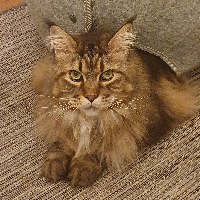

'CAT - 54% cat; 46% dog'

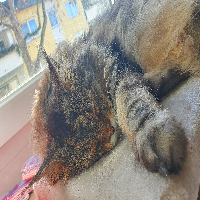

'CAT - 100% cat; 0% dog'

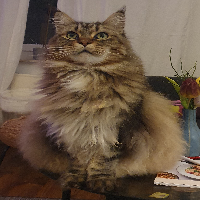

'CAT - 100% cat; 0% dog'

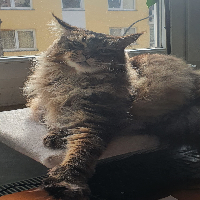

'CAT - 100% cat; 0% dog'

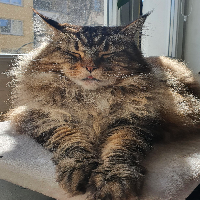

'CAT - 100% cat; 0% dog'

In [17]:
my_cats = ['my_cats/a1.jpg','my_cats/a2.jpg','my_cats/a3.jpg', 'my_cats/d1.jpg', 'my_cats/d2.jpg', 'my_cats/d3.jpg', 'my_cats/d4.jpg', 'my_cats/d5.jpg']
for cat in my_cats: 
    display(image.load_img(cat,False,target_size=(200,200)), classify(cat))

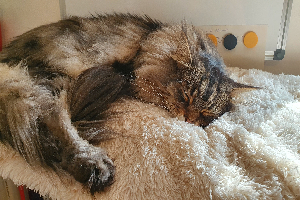

'DOG - 0% cat; 100% dog'

In [18]:
athos = image.load_img('my_cats/Athos.jpg',False,target_size=(200,300))
display(athos, classify('my_cats/a0.jpg'))

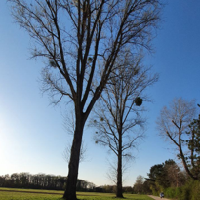

'DOG - 0% cat; 100% dog'

In [19]:
display(image.load_img('my_cats/tree.png',False,target_size=(200,200)), classify('my_cats/tree.png'))